In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras import callbacks, optimizers

import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
# dimensions of our images
train_data_pth = '/home/matt/Repos/simpsons/data_raw/color/train'
validation_data_pth = '/home/matt/Repos/simpsons/data_raw/color/validation'
n_train_samples = 1800
n_validation_samples = 100
n_epochs = 10
batch_size = 20
n_classes = 4
img_width, img_height = 80, 80
input_shape = (img_width, img_height, 3)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_pth,
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical')

Found 1801 images belonging to 4 classes.


In [4]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_pth, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical')

Found 687 images belonging to 4 classes.


In [5]:
# sets up the model shape
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [6]:
# runs the model
model.fit_generator(
    train_generator, 
    validation_data=validation_generator,
    steps_per_epoch=int(n_train_samples / batch_size),
    validation_steps=int(n_validation_samples / batch_size), 
    epochs=n_epochs,
    class_weight='balanced'
)

Epoch 1/10
90/90 [==============================] - 4s - loss: 0.9577 - acc: 0.5911 - val_loss: 0.7623 - val_acc: 0.7000
Epoch 2/10
90/90 [==============================] - 4s - loss: 0.6226 - acc: 0.7555 - val_loss: 0.3668 - val_acc: 0.8500
Epoch 3/10
90/90 [==============================] - 4s - loss: 0.5130 - acc: 0.8083 - val_loss: 0.4731 - val_acc: 0.8300
Epoch 4/10
90/90 [==============================] - 4s - loss: 0.4206 - acc: 0.8344 - val_loss: 0.3355 - val_acc: 0.9400
Epoch 5/10
90/90 [==============================] - 4s - loss: 0.3806 - acc: 0.8672 - val_loss: 0.2397 - val_acc: 0.8736
Epoch 6/10
90/90 [==============================] - 4s - loss: 0.2840 - acc: 0.8928 - val_loss: 0.2676 - val_acc: 0.9300
Epoch 7/10
90/90 [==============================] - 4s - loss: 0.2649 - acc: 0.9078 - val_loss: 0.3075 - val_acc: 0.8900
Epoch 8/10
90/90 [==============================] - 4s - loss: 0.2032 - acc: 0.9300 - val_loss: 0.2037 - val_acc: 0.9300
Epoch 9/10
90/90 [==============

In [7]:
folders = ['bart', 'hommer', 'lisa', 'marge']
y = []
y_hat = []

for i in range(len(folders)):
    files = glob.glob('/home/matt/Repos/simpsons/data_raw/color/validation/' + folders[i] + '/*.jpg')
    for f in files:
        img = Image.open(f)
        img = img.resize((img_width, img_height), Image.ANTIALIAS)
        y.append(i)
        y_hat.append(model.predict_classes(np.expand_dims(np.asarray(img), axis=0))[0])

1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [8]:
sum(1 for i, j in zip(y_hat, y) if i == j) / float(len(y_hat))

0.868995633187773

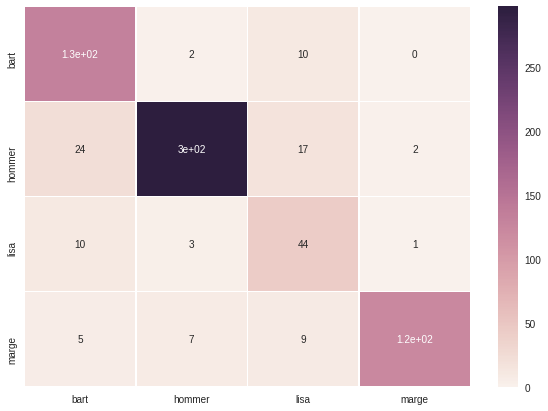

In [9]:
conf_matrix = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
for i in range(len(y)):
    conf_matrix[y[i]][y_hat[i]] += 1

df_cm = pd.DataFrame(conf_matrix, index = ['bart', 'hommer', 'lisa', 'marge'],
                  columns = ['bart', 'hommer', 'lisa', 'marge'])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=0.5)